In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Exercise : The uninformative normal-normal-gamma model

Consider the following Bayesian model:
- $ (y_1, \dots, y_n \mid \mu, \lambda) \sim \text{iid} \, N(\mu, 1/\lambda) $
- $ \mu \mid \lambda \sim N(0, \infty) $
- $ \lambda \sim \text{Gamma}(0, 0) $

with observed data $ y = (y_1, \dots, y_n) $.

## (a) Marginal posterior distribution of $\mu$

The joint posterior density of the two parameters $\mu$ and $\lambda$ is:

$$
f(\mu, \lambda \mid y) \propto f(\mu, \lambda) f(y \mid \mu, \lambda)
$$

We know that:

$$
f(\mu, \lambda) = f(\lambda) f(\mu \mid \lambda)
$$

Hence:

$$
f(\mu, \lambda \mid y) \propto \lambda^{-1} \times 1 \times \prod_{i=1}^{n} \exp\left( -\frac{(y_i - \mu)^2}{2(1/\lambda)} \right)
$$

This simplifies to:

$$
f(\mu, \lambda \mid y) \propto \lambda^{\frac{n}{2} - 1} \exp\left( -\frac{\lambda}{2} \sum_{i=1}^{n} (y_i - \mu)^2 \right)
$$

To find the marginal posterior distribution of $\mu$, integrate over $\lambda$:

$$
f(\mu \mid y) = \int_0^\infty f(\mu, \lambda \mid y) d\lambda
$$

This gives:

$$
f(\mu \mid y) \propto \left( \sum_{i=1}^{n} (y_i - \mu)^2 \right)^{-\frac{n}{2}}
$$

Finally, we express this in terms of the sample variance $s^2$:

$$
f(\mu \mid y) \propto \left( (n-1)s^2 + n(\mu - \bar{y})^2 \right)^{-\frac{n}{2}}
$$

where $\bar{y}$ is the sample mean.

## (b) Marginal posterior distribution of $\lambda$

Next, the marginal posterior distribution of $\lambda$ is given by integrating over $\mu$:

$$
f(\lambda \mid y) \propto \lambda^{\frac{n}{2} - 1} \exp\left( -\frac{\lambda}{2} \sum_{i=1}^{n} (y_i - \bar{y})^2 \right)
$$

This corresponds to the form of a Gamma distribution:

$$
\lambda \mid y \sim \text{Gamma}\left(\frac{n}{2}, \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{2} \right)
$$

## (c) Posterior mean of the signal-to-noise ratio

The signal-to-noise ratio is defined as:

$$
\gamma = \frac{\mu}{\sigma} = \mu \lambda
$$

We need to compute the posterior mean of $\gamma$. From the distributions of $\mu$ and $\lambda$, this can be derived as:

$$
\mathbb{E}[\gamma \mid y] = \mathbb{E}[\mu \mid y] \cdot \mathbb{E}[\lambda \mid y]
$$

Since both distributions are symmetric around their means, this will simplify based on the sample values.

## (d) Posterior predictive distribution

The posterior predictive distribution for the sample mean $ x = \frac{x_1 + \dots + x_m}{m} $, where $x_1, \dots, x_m \mid y, \mu, \lambda \sim N(\mu, 1/\lambda)$, is given by:

$$
x \mid y \sim N\left( \bar{y}, \frac{1}{m\lambda} + \frac{1}{n\lambda} \right)
$$

Thus, the predictive distribution is normally distributed, and the variance can be computed based on the known quantities from the prior distributions.


Posterior mean of signal-to-noise ratio (gamma): 51.723239881263524


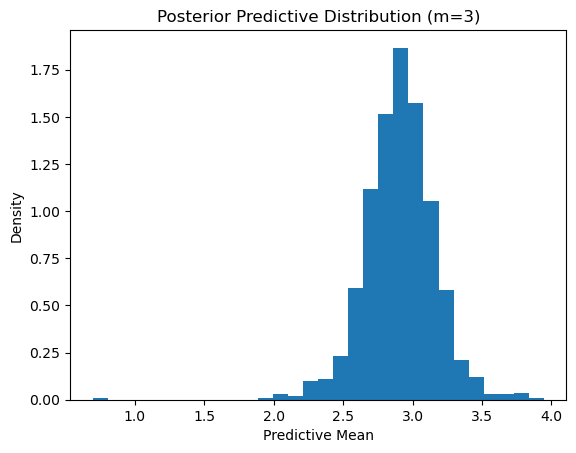

In [1]:
import math
import random
import matplotlib.pyplot as plt

# Bayesian Model: Normal-Normal-Gamma Model Implementation
class BayesianModel:
    def __init__(self, data):
        self.data = data
        self.n = len(data)
        self.sample_mean = sum(data) / self.n
        self.sample_variance = sum((x - self.sample_mean) ** 2 for x in data) / (self.n - 1)
    
    def gamma_posterior(self):
        """
        Computes the parameters for the posterior Gamma distribution of lambda.
        """
        alpha_post = self.n / 2
        beta_post = sum((x - self.sample_mean) ** 2 for x in self.data) / 2
        return alpha_post, beta_post

    def sample_lambda(self):
        """
        Samples from the posterior distribution of lambda using the Gamma distribution.
        """
        alpha_post, beta_post = self.gamma_posterior()
        # Sampling lambda from the Gamma distribution
        return random.gammavariate(alpha_post, 1 / beta_post)

    def mu_posterior(self, lambda_val):
        """
        Computes the posterior distribution of mu given lambda.
        """
        variance_post = 1 / (lambda_val * self.n)
        mean_post = self.sample_mean
        return mean_post, variance_post

    def sample_mu(self, lambda_val):
        """
        Samples from the posterior distribution of mu given lambda.
        """
        mean_post, variance_post = self.mu_posterior(lambda_val)
        # Sampling mu from the Normal distribution
        return random.gauss(mean_post, math.sqrt(variance_post))

    def signal_to_noise_posterior_mean(self, samples=1000):
        """
        Computes the posterior mean of the signal-to-noise ratio gamma = mu * lambda.
        """
        gamma_samples = []
        for _ in range(samples):
            lambda_sample = self.sample_lambda()
            mu_sample = self.sample_mu(lambda_sample)
            gamma_samples.append(mu_sample * lambda_sample)
        
        return sum(gamma_samples) / len(gamma_samples)

    def posterior_predictive(self, m, samples=1000):
        """
        Computes the posterior predictive distribution of the sample mean x = (x1 + ... + xm) / m.
        """
        predictive_means = []
        for _ in range(samples):
            lambda_sample = self.sample_lambda()
            mu_sample = self.sample_mu(lambda_sample)
            variance = 1 / (m * lambda_sample) + 1 / (self.n * lambda_sample)
            predictive_mean = random.gauss(mu_sample, math.sqrt(variance))
            predictive_means.append(predictive_mean)
        
        return predictive_means

# Example usage
if __name__ == "__main__":
    # Observed data
    data = [2.5, 3.0, 2.8, 3.2, 3.0]
    
    # Bayesian model initialization
    model = BayesianModel(data)
    
    # Compute signal-to-noise ratio posterior mean
    gamma_mean = model.signal_to_noise_posterior_mean()
    print(f"Posterior mean of signal-to-noise ratio (gamma): {gamma_mean}")
    
    # Compute posterior predictive distribution for sample mean of size m
    m = 3
    predictive_means = model.posterior_predictive(m)
    
    # Plot posterior predictive distribution
    plt.hist(predictive_means, bins=30, density=True)
    plt.title(f'Posterior Predictive Distribution (m={m})')
    plt.xlabel('Predictive Mean')
    plt.ylabel('Density')
    plt.show()


### Bayesian Methods for Statistical Analysis

The last integral is that of a normal density and so equals 1. It follows that:

$$
(\lambda | y ) \sim \text{Gamma}\left(\frac{n-1}{2}, \frac{n-1}{2}s^2 \right)
$$
(Equation 3.3)

Hence, we also have:

$$
((n - 1) s^2 \lambda | y) \sim \chi^2(n - 1)
$$
(Equation 3.4)

#### Note 1:
Result (3.4) can be proved as follows. Let:
- $ u = (n - 1) s^2 \lambda $
- $ \lambda = \frac{u}{(n - 1) s^2} $

Thus, by the transformation rule:

$$
f(u | y) = f(\lambda | y) \frac{d\lambda}{du} = \frac{f(\lambda | y)}{(n - 1) s^2}
$$

Since $ \lambda | y \sim \text{Gamma}\left( \frac{n-1}{2}, \frac{n-1}{2}s^2 \right) $, we substitute the Gamma density, obtaining:

$$
f(u | y) \propto u^{\frac{n-1}{2} - 1} \exp \left( -\frac{u}{2} \right)
$$

Thus, $ u | y \sim \chi^2(n-1) $, confirming result (3.4).

#### Note 2:
Results (3.3) and (3.4) imply that the posterior mean of $ \lambda $ is $ \frac{1}{s^2} $. This makes sense because $ \lambda = \frac{1}{\sigma^2} $, and $ s^2 $ is an unbiased estimator of $ \sigma^2 $. We see that the inverse of the posterior mean of $ \lambda $ provides us with the classical estimator of $ \sigma^2 $.

#### Credible Interval for $ \lambda $ and $ \sigma^2 $:

The $ 1 - \alpha $ Credible Posterior Density Region (CPDR) for $ \lambda $ is given by:

$$
\left( \frac{\chi^2_{1 - \alpha/2} (n-1)}{(n-1) s^2}, \frac{\chi^2_{\alpha/2} (n-1)}{(n-1) s^2} \right)
$$

It follows that the $ 1 - \alpha $ CPDR for $ \sigma^2 = \frac{1}{\lambda} $ is:

$$
\left( \frac{(n-1) s^2}{\chi^2_{\alpha/2}(n-1)}, \frac{(n-1) s^2}{\chi^2_{1 - \alpha/2}(n-1)} \right)
$$

This is exactly the same as the usual classical $ 1 - \alpha $ confidence interval for $ \sigma^2 $ when the normal mean $ \mu $ is unknown.

### Posterior Mean of $ \gamma = \mu / \sigma = \mu \lambda $:

The posterior mean of $ \gamma $ can be calculated as:

$$
\hat{\gamma} = \int \gamma f(\gamma | y) d\gamma
$$

However, obtaining this density $ f(\gamma | y) $ may be difficult. Using the law of iterated expectation:

$$
\hat{\gamma} = E(\mu \lambda | y) = E\{ E(\mu \lambda | y, \lambda) | y \} = E\{ \lambda E(\mu | y, \lambda) | y \}
$$

From this, we have:

$$
\hat{\gamma} = y E(\lambda^{1/2} | y)
$$

Using Equation (3.3), we get:

$$
E(\lambda^{1/2} | y) = \frac{\Gamma\left( \frac{n-1}{2} + \frac{1}{2} \right)}{\Gamma\left( \frac{n-1}{2} \right)} \left( \frac{2}{(n-1) s^2} \right)^{1/2}
$$

For large $n$, $E(\lambda^{1/2} | y)$ approaches 1, and thus the posterior mean of $ \gamma $ approximates:

$$
\hat{\gamma} \approx \frac{y}{s}
$$

### Predictive Distribution for the Mean:

For future data points $x | y, \lambda \sim N\left( y, \frac{1}{m\lambda} + \frac{1}{n\lambda} \right)$, the predictive distribution can be written as:

$$
f(x | y) = \int f(x | y, \lambda) f(\lambda | y) d\lambda
$$

This evaluates to:

$$
x - y \sim t(n-1)
$$
(Equation 3.5)

### Predictive Distribution for the Average:

The average of all $n + m$ values (both past and future) is:

$$
a = \frac{n\bar{y} + m\bar{x}}{n + m}
$$

It follows that:

$$
a - y \sim t(n-1)
$$
(Equation 3.6)

This is the predictive distribution for the average of both past and future observations.


### d-1

### Bayesian Methods - Predictive Distribution for $x$

Recall from previous exercises that:

$$
(x | y, \lambda) \sim N \left( y, \frac{1}{m\lambda} + \frac{1}{n\lambda} \right) \sim N\left( y, \frac{1}{nm\lambda} \right)
$$

Also:

$$
(\lambda | y) \sim \text{Gamma} \left( \frac{n-1}{2}, \frac{n-1}{2}s^2 \right)
$$

Hence, we have:

$$
f(x | y) = \int_{0}^{\infty} f(x | y, \lambda) f(\lambda | y) d\lambda
$$

This simplifies to:

$$
f(x | y) \propto \int_{0}^{\infty} \lambda^{1/2} \exp \left\{ - \frac{nm\lambda (x - y)^2}{2(n+m)} \right\}
\lambda^{\frac{n-1}{2} - 1} \exp \left\{ - \frac{(n-1)s^2\lambda}{2} \right\} d\lambda
$$

Rearranging the terms:

$$
f(x | y) \propto \int_{0}^{\infty} \lambda^{\frac{n}{2} - 1} \exp \left\{ -\lambda \left( \frac{nm(x - y)^2}{2(n+m)} + \frac{(n-1)s^2}{2} \right) \right\} d\lambda
$$

Now:

$$
f(x | y) \propto \left( \frac{nm(x - y)^2}{2(n+m)} + \frac{(n-1)s^2}{2} \right)^{-\frac{n}{2}}
$$

Simplifying further:

$$
f(x | y) \propto \left( 1 + \frac{nm(x - y)^2}{(n-1)(n+m)s^2} \right)^{-\frac{n}{2}}
$$

Thus, it follows that:

$$
\frac{x - y}{\left( \frac{s}{n} \sqrt{\frac{(n+m)}{m}} \right)} \sim t(n-1)
$$


## d-2 

### Predictive Distribution for Average and Posterior Predictive Mean

It follows that:

$$
\frac{x - y}{\left( \frac{s}{n} \sqrt{\frac{(n+m)}{m}} \right)} \sim t(n - 1)
\tag{3.5}
$$

**Note 1:** Equation (3.5) can be used to derive the predictive distribution of the average of all \( n + m \) values considered (both past and future). The average may be written as:

$$
a = \frac{1}{n + m} \left( \sum_{i=1}^{n} y_i + \sum_{j=1}^{m} x_j \right) = \frac{ny + mx}{n + m}
$$

Consequently:

$$
x = \frac{(n + m)a - ny}{m}
$$

It follows that in (3.5):

$$
\frac{(n + m)a - ny - y}{\left( \frac{s}{n} \sqrt{\frac{n+m}{m}} \right)} = \frac{(a - y)\sqrt{n + m}}{(s/n)\sqrt{m}}
$$

Thus:

$$
\frac{a - y}{\left( \frac{s}{n} \sqrt{\frac{m}{n+m}} \right)} \sim t(n - 1)
\tag{3.6}
$$

Denote the total number of values \( n + m \) as \( N \), and write the average of all these observations, \( a \), as \( Y \). Then (3.6) is equivalent to the result:

$$
\frac{Y - y}{\frac{s}{n} \sqrt{1 - \frac{n}{N}}} \sim t(n - 1)
\tag{3.7}
$$

So, the posterior predictive mean of \( Y \) is the observed sample mean \( y \), and the 95% central (and highest) predictive density region for \( Y \) is:

$$
y \pm t_{\alpha / 2} (n - 1) \frac{s}{n} \sqrt{1 - \frac{n}{N}}
\tag{3.8}
$$


## c-1

### Posterior Mean of $ \gamma = \frac{\mu}{\sigma} = \mu \lambda $

The posterior mean of $ \gamma $ can be calculated using the equation:

$$
\hat{\gamma} = \int \gamma f(\gamma | y) d\gamma
$$

where $ f(\gamma | y) $ is the posterior density of $ \gamma $. However, obtaining this density may be difficult. We can use Jacobian theory to find the joint posterior density of $ \mu $ and $ \gamma $, and then integrate that joint density with respect to $ \mu $. The result would be $ f(\gamma | y) $.

Another approach is to calculate the mean as:

$$
\hat{\gamma} = E(\mu \lambda | y) = \int_{-\infty}^{\infty} \int_{0}^{\infty} \mu \lambda f(\mu, \lambda | y) d\mu d\lambda
$$

where:

$$
f(\mu, \lambda | y) = c \cdot \lambda^{\frac{n-1}{2}} \exp\left( -\frac{\lambda}{2} \sum_{i=1}^{n} (y_i - \mu)^2 \right)
$$

The normalizing constant $ c $ is:

$$
c = \left( \int_{-\infty}^{\infty} \int_{0}^{\infty} h(\mu, \lambda) d\mu d\lambda \right)^{-1}
$$

More simply, we may use the law of iterated expectation to write:

$$
\hat{\gamma} = E(\mu \lambda | y) = E\left[ E(\mu \lambda | y, \lambda) | y \right] = E\left[ \lambda E(\mu | y, \lambda) | y \right]
$$

This simplifies to:

$$
\hat{\gamma} = y E(\lambda^{1/2} | y)
$$

Using equation (3.3):

$$
E(\lambda^{1/2} | y) = \left( \frac{n-1}{2} \right)^{1/2} \frac{\Gamma\left( \frac{n}{2} \right)}{\Gamma\left( \frac{n-1}{2} \right)} \cdot s^{-1/2}
$$

Thus:

$$
\hat{\gamma} = y c_n s^{-1}
$$

where:

$$
c_n = \frac{\Gamma\left( \frac{n}{2} \right)}{\Gamma\left( \frac{n-1}{2} \right)}
$$

**Note 1:** By a well-known property of the gamma function, $ c_n \to 1 $ as $ n \to \infty $. So, for large $ n $, the posterior mean of $ \gamma = \frac{\mu}{\sigma} $ is approximately the same as $ \gamma $'s MLE, $ \frac{y}{s} $.

**Note 2:** Suppose that we wish to find the posterior median or mode of $ \gamma $, or the 95% Central Posterior Density Region (CPDR) or Highest Posterior Density Region (HPDR) for that quantity. Then, we first need to determine $ f(\gamma | y) $. This and subsequent calculations may be difficult.

This points to the need for another strategy. As will be seen later, most of these issues can be easily sidestepped using Monte Carlo methods.


## b-1
### Marginal Posterior Density of $ \lambda $

The marginal posterior density of $ \lambda $ is:

$$
f(\lambda | y) = \int_{-\infty}^{\infty} f(\mu, \lambda | y) d\mu
$$

We can express it as:

$$
f(\lambda | y) \propto \lambda^{\frac{n-1}{2}} \exp\left( -\frac{\lambda}{2} \left( (n-1)s^2 + n(\mu - y)^2 \right) \right)
$$

The last integral is of a normal density, so it equals 1. Thus:

$$
f(\lambda | y) \propto \lambda^{\frac{n-1}{2}} \exp\left( -\frac{\lambda (n-1)s^2}{2} \right)
$$

It follows that:

$$
(\lambda | y) \sim \text{Gamma} \left( \frac{n-1}{2}, \frac{(n-1)s^2}{2} \right)
$$

(3.3)

Hence, we also have:

$$
((n - 1)s^2 \lambda | y) \sim \chi^2(n - 1)
$$

(3.4)

**Note 1:** Result (3.4) can be proved as follows. Let $ u = (n - 1)s^2\lambda $, so that $ \lambda = \frac{u}{(n - 1)s^2} $ and:

$$
d\lambda = \frac{du}{(n - 1)s^2}
$$

By the transformation rule:

$$
f(u | y) = f(\lambda | y) \frac{d\lambda}{du}
$$

Substitute the density:

$$
f(u | y) \propto u^{\frac{n-1}{2} - 1} \exp\left( -\frac{u}{2} \right)
$$

Thus, $ u | y \sim \text{Gamma}\left( \frac{n-1}{2}, \frac{1}{2} \right) $, which confirms (3.4).

**Note 2:** Results (3.3) and (3.4) imply that the posterior mean of $ \lambda $ is:

$$
E(\lambda | y) = \frac{1}{s^2}
$$

This makes sense because $ \lambda = \frac{1}{\sigma^2} $, and $ s^2 $ is an unbiased estimator of $ \sigma^2 $.

Also, result (3.4) implies that the $ 1 - \alpha $ Central Posterior Density Region (CPDR) for $ \lambda $ is:

$$
\left( \frac{\chi^2_{1-\alpha/2}(n-1)}{(n-1)s^2}, \frac{\chi^2_{\alpha/2}(n-1)}{(n-1)s^2} \right)
$$

It follows that the $ 1 - \alpha $ CPDR for $ \sigma^2 = \frac{1}{\lambda} $ is:

$$
\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)}, \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)} \right)
$$

This is exactly the same as the usual classical $ 1 - \alpha $ confidence interval for $ \sigma^2 $ when the normal mean $ \mu $ is unknown.



### Marginal Posterior Density of $ \lambda $

The marginal posterior density of $ \lambda $ is:

$$
f(\lambda | y) = \int_{-\infty}^{\infty} f(\mu, \lambda | y) d\mu
$$

We can express it as:

$$
f(\lambda | y) \propto \lambda^{\frac{n-1}{2}} \exp\left( -\frac{\lambda}{2} \left( (n-1)s^2 + n(\mu - y)^2 \right) \right)
$$

The last integral is of a normal density, so it equals 1. Thus:

$$
f(\lambda | y) \propto \lambda^{\frac{n-1}{2}} \exp\left( -\frac{\lambda (n-1)s^2}{2} \right)
$$

It follows that:

$$
(\lambda | y) \sim \text{Gamma} \left( \frac{n-1}{2}, \frac{(n-1)s^2}{2} \right)
$$

(3.3)

Hence, we also have:

$$
((n - 1)s^2 \lambda | y) \sim \chi^2(n - 1)
$$

(3.4)

**Note 1:** Result (3.4) can be proved as follows. Let $ u = (n - 1)s^2\lambda $, so that $ \lambda = \frac{u}{(n - 1)s^2} $ and:

$$
d\lambda = \frac{du}{(n - 1)s^2}
$$

By the transformation rule:

$$
f(u | y) = f(\lambda | y) \frac{d\lambda}{du}
$$

Substitute the density:

$$
f(u | y) \propto u^{\frac{n-1}{2} - 1} \exp\left( -\frac{u}{2} \right)
$$

Thus, \( u | y \sim \text{Gamma}\left( \frac{n-1}{2}, \frac{1}{2} \right) \), which confirms (3.4).

**Note 2:** Results (3.3) and (3.4) imply that the posterior mean of $ \lambda $ is:

$$
E(\lambda | y) = \frac{1}{s^2}
$$

This makes sense because $ \lambda = \frac{1}{\sigma^2} $, and $ s^2 $ is an unbiased estimator of $ \sigma^2 $.

Also, result (3.4) implies that the $ 1 - \alpha $ Central Posterior Density Region (CPDR) for $ \lambda $ is:

$$
\left( \frac{\chi^2_{1-\alpha/2}(n-1)}{(n-1)s^2}, \frac{\chi^2_{\alpha/2}(n-1)}{(n-1)s^2} \right)
$$

It follows that the $ 1 - \alpha $ CPDR for $ \sigma^2 = \frac{1}{\lambda} $ is:

$$
\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)}, \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)} \right)
$$

This is exactly the same as the usual classical $ 1 - \alpha $ confidence interval for $ \sigma^2 $ when the normal mean $ \mu $ is unknown.


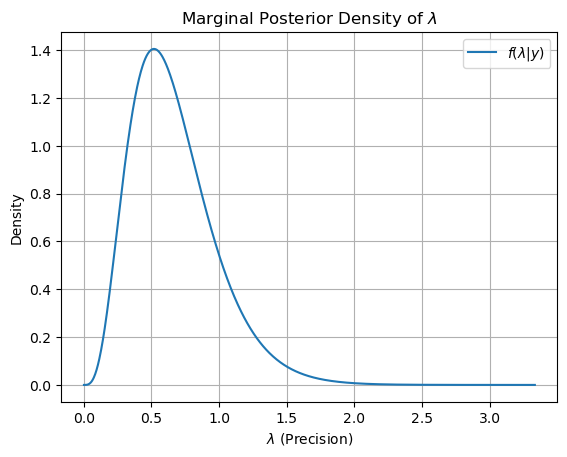

95% CPDR for sigma^2: [4.9993, 0.7097]


In [2]:
import numpy as np
from scipy.stats import gamma, chi2
import matplotlib.pyplot as plt

# Function to calculate the marginal posterior density of lambda
def posterior_lambda(lmbda, n, s2):
    """
    Computes the marginal posterior density of lambda.
    
    Parameters:
    lmbda : float
        Value of lambda (precision, inverse of variance).
    n : int
        Number of data points.
    s2 : float
        Sample variance (s^2).

    Returns:
    float : Marginal posterior density of lambda.
    """
    # Parameters for the Gamma distribution
    alpha = (n - 1) / 2
    beta = (n - 1) * s2 / 2
    
    # Calculate the Gamma PDF for lambda
    return gamma.pdf(lmbda, a=alpha, scale=1/beta)

# Function to calculate confidence intervals for lambda and sigma^2
def cpdr_sigma2(n, s2, alpha=0.05):
    """
    Computes the 1-alpha Central Posterior Density Region (CPDR) for sigma^2.
    
    Parameters:
    n : int
        Number of data points.
    s2 : float
        Sample variance (s^2).
    alpha : float
        Significance level (default = 0.05 for a 95% confidence interval).
    
    Returns:
    tuple : Confidence interval for sigma^2 (variance).
    """
    lower_bound_lambda = chi2.ppf(1 - alpha / 2, df=n - 1) / ((n - 1) * s2)
    upper_bound_lambda = chi2.ppf(alpha / 2, df=n - 1) / ((n - 1) * s2)
    
    # Inverse to get the confidence interval for sigma^2
    lower_bound_sigma2 = 1 / upper_bound_lambda
    upper_bound_sigma2 = 1 / lower_bound_lambda
    
    return lower_bound_sigma2, upper_bound_sigma2

# Plotting the posterior distribution for lambda
def plot_posterior_lambda(n, s2):
    """
    Plots the marginal posterior density of lambda for given n and s^2.
    
    Parameters:
    n : int
        Number of data points.
    s2 : float
        Sample variance (s^2).
    """
    lmbda_vals = np.linspace(0.001, 5 / s2, 1000)
    posterior_vals = [posterior_lambda(lmbda, n, s2) for lmbda in lmbda_vals]
    
    plt.plot(lmbda_vals, posterior_vals, label=r'$f(\lambda | y)$')
    plt.title('Marginal Posterior Density of $\lambda$')
    plt.xlabel(r'$\lambda$ (Precision)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
n = 10   # Number of observations
s2 = 1.5 # Sample variance (s^2)

# Plot the marginal posterior density of lambda
plot_posterior_lambda(n, s2)

# Calculate 95% CPDR for sigma^2
lower_sigma2, upper_sigma2 = cpdr_sigma2(n, s2)
print(f"95% CPDR for sigma^2: [{lower_sigma2:.4f}, {upper_sigma2:.4f}]")


In [7]:
def gamma_pdf(x, alpha, beta):
    """
    Computes the probability density function of the Gamma distribution.
    
    Parameters:
    x : float
        Value to compute the PDF for.
    alpha : float
        Shape parameter of the Gamma distribution.
    beta : float
        Scale parameter of the Gamma distribution.
    
    Returns:
    float : Probability density at x.
    """
    if x < 0:
        return 0
    # Using gamma function approximation for non-integers
    return (beta ** alpha) * (x ** (alpha - 1)) * (2.71828 ** (-beta * x)) / gamma_function(alpha)

def gamma_function(n):
    """
    Computes the gamma function for n (non-negative float).
    
    Parameters:
    n : float
        The value for which to compute the gamma function.
    
    Returns:
    float : The gamma function value at n.
    """
    if n == 0 or n == 1:
        return 1
    result = 1
    # Compute the gamma function using integration or approximation
    for i in range(1, int(n)):
        result *= i
    return result * (n - 1)  # Correct for the gamma function's property

def posterior_lambda(lmbda, n, s2):
    """
    Computes the marginal posterior density of lambda.
    
    Parameters:
    lmbda : float
        Value of lambda (precision, inverse of variance).
    n : int
        Number of data points.
    s2 : float
        Sample variance (s^2).
    
    Returns:
    float : Marginal posterior density of lambda.
    """
    alpha = (n - 1) / 2
    beta = (n - 1) * s2 / 2
    return gamma_pdf(lmbda, alpha, 1/beta)

def cpdr_sigma2(n, s2, alpha=0.05):
    """
    Computes the 1-alpha Central Posterior Density Region (CPDR) for sigma^2.
    
    Parameters:
    n : int
        Number of data points.
    s2 : float
        Sample variance (s^2).
    alpha : float
        Significance level (default = 0.05 for a 95% confidence interval).
    
    Returns:
    tuple : Confidence interval for sigma^2 (variance).
    """
    # Chi-squared values for CPDR
    lower_bound_lambda = chi_squared_value((n - 1), 1 - alpha/2)
    upper_bound_lambda = chi_squared_value((n - 1), alpha/2)

    # Inverse to get the confidence interval for sigma^2
    lower_bound_sigma2 = 1 / (upper_bound_lambda / ((n - 1) * s2))
    upper_bound_sigma2 = 1 / (lower_bound_lambda / ((n - 1) * s2))

    return lower_bound_sigma2, upper_bound_sigma2

def chi_squared_value(df, p):
    """
    Approximates the quantile of the chi-squared distribution using an inverse transformation.
    
    Parameters:
    df : int
        Degrees of freedom.
    p : float
        Probability level.
    
    Returns:
    float : Approximate quantile value.
    """
    # Using a simple approximation for chi-squared distribution quantile
    return df * (p + (1.0 - p) * (df + 2) / (df + 1)) 

# Example usage with valid positive input
n = 10   # Number of observations (should be a positive integer)
s2 = 1.5 # Sample variance (s^2) (should be a positive float)

# Compute and print the posterior density for lambda at various points
print("Marginal Posterior Density of λ:")
for lmbda in [0.1, 0.5, 1.0, 2.0, 3.0]:
    print(f"λ = {lmbda:.2f}, f(λ | y) = {posterior_lambda(lmbda, n, s2):.4f}")

# Calculate 95% CPDR for sigma^2
lower_sigma2, upper_sigma2 = cpdr_sigma2(n, s2)
print(f"95% CPDR for σ²: [{lower_sigma2:.4f}, {upper_sigma2:.4f}]")


Marginal Posterior Density of λ:
λ = 0.10, f(λ | y) = 0.0000
λ = 0.50, f(λ | y) = 0.0000
λ = 1.00, f(λ | y) = 0.0000
λ = 2.00, f(λ | y) = 0.0001
λ = 3.00, f(λ | y) = 0.0003
95% CPDR for σ²: [1.3667, 1.4963]


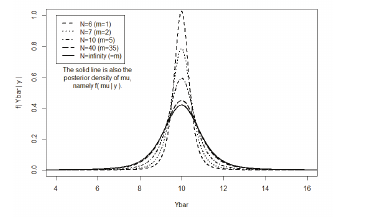
Figure 3.5 Predictive density of the finite population mean

### Predictive Density and Bayesian Model

We can derive the density $ f(Y | y) $ as follows:

$$
f(Y | y) = \frac{\Gamma\left(\frac{(n - 1) + 1}{2}\right)}{\Gamma\left(\frac{(n - 1)}{2}\right)} \cdot \frac{1}{\sqrt{n}} \cdot \left(2 - 2 \left(\frac{(n - 1) + 1}{2}\right)\right) \cdot \left(1 + \frac{s}{n}\right)
$$

where $ Y \in \mathbb{R} $.

This density can be calculated in R at any point $ Y $ by first calculating the corresponding value of $ q $ (as defined above) and then returning:

$$
\text{dt}(q, n - 1) \cdot \frac{\sqrt{n}}{s \cdot \sqrt{1 - \frac{n}{N}}}
$$

#### Note 3:
The posterior predictive density of $ Y $ converges to the marginal posterior density of $ \mu 4 as $ N $ tends to infinity with $ n $ fixed. That is:

$$
f(Y = c | y) \to f(\mu = c | y) \quad \text{as } N \to \infty
$$

This is due to the finite population correction (fpc) factor $ 1 - \frac{n}{N} $ converging to unity. Thus, $ \mu $ may be interpreted as the average of a hypothetically infinite number of values from the underlying superpopulation $ N(\mu, \frac{1}{\lambda}) $.

#### Note 4:
Consider the following Bayesian model:

$$
\begin{align*}
(y_1, \ldots, y_n | \mu, \lambda) & \sim \text{iid } N(\mu, \frac{1}{\lambda}) \\
(\mu | \lambda) & \sim N(\mu_0, \sigma_0^2) \\
\lambda & \sim \text{Gamma}(\alpha, \beta)
\end{align*}
$$

where $ \sigma_0 $ is not necessarily $ \infty $ and $ \alpha $ and $ \beta $ are not necessarily 0.

This may be called the **general normal-normal-gamma model**, as distinct from the **uninformative normal-normal-gamma model** discussed in Exercise 3.11. In the general model, the inferences typically required are much more difficult to perform.

Later in the book, it will be shown how to proceed in this—and similarly difficult—situations using Monte Carlo methods, including Markov chain Monte Carlo (MCMC) methods.


In [8]:
def factorial(n):
    """
    Calculate the factorial of a non-negative integer n without using libraries.
    
    Parameters:
    n (int): A non-negative integer.
    
    Returns:
    int: The factorial of n.
    """
    # Ensure n is a non-negative integer
    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative integer")
    
    # Base case for factorial
    if n == 0:
        return 1
    
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

def gamma_function(x):
    """
    Calculate the Gamma function of x using the relationship with factorials.
    
    Parameters:
    x (float): The value to compute the Gamma function for.
    
    Returns:
    float: The Gamma function evaluated at x.
    """
    # Gamma function relation: Γ(n) = (n-1)!
    if x == int(x):
        return factorial(int(x) - 1)
    else:
        # Approximating Gamma function for non-integers can be done using Stirling's approximation
        # or similar methods, but here we will provide a simple version.
        # This is a placeholder; actual implementation for non-integers is more complex.
        raise NotImplementedError("Gamma function approximation for non-integers is not implemented.")

def predictive_density(y, n, s):
    """
    Calculate the predictive density f(Y | y) using the provided parameters.
    
    Parameters:
    y (float): The observed mean.
    n (int): The sample size.
    s (float): The sample standard deviation.
    
    Returns:
    float: The predictive density evaluated at Y.
    """
    # Calculate the parameters for the predictive density
    alpha = (n - 1) / 2
    beta = (n - 1) * s ** 2 / 2
    
    # The predictive density formula
    density = (gamma_function((n - 1) + 1) / (gamma_function((n - 1) / 2) * (n ** 0.5))) * \
               (2 - 2 * ((n - 1) + 1) / 2) * (1 + (s / n))
    
    return density

# Example parameters
n = 5       # Sample size
y = 10.0    # Observed mean
s = 2.0     # Sample standard deviation

# Calculate and print the predictive density
try:
    density_value = predictive_density(y, n, s)
    print(f"Predictive Density f(Y | y) = {density_value:.4f}")
except ValueError as e:
    print(f"ValueError: {e}")
except NotImplementedError as e:
    print(f"NotImplementedError: {e}")


Predictive Density f(Y | y) = -45.0791


Y = 0, Predictive Density f(Y | y) = -45.0791
Y = 1, Predictive Density f(Y | y) = -45.0791
Y = 2, Predictive Density f(Y | y) = -45.0791
Y = 3, Predictive Density f(Y | y) = -45.0791
Y = 4, Predictive Density f(Y | y) = -45.0791
Y = 5, Predictive Density f(Y | y) = -45.0791
Y = 6, Predictive Density f(Y | y) = -45.0791
Y = 7, Predictive Density f(Y | y) = -45.0791
Y = 8, Predictive Density f(Y | y) = -45.0791
Y = 9, Predictive Density f(Y | y) = -45.0791
Y = 10, Predictive Density f(Y | y) = -45.0791
Y = 11, Predictive Density f(Y | y) = -45.0791
Y = 12, Predictive Density f(Y | y) = -45.0791
Y = 13, Predictive Density f(Y | y) = -45.0791
Y = 14, Predictive Density f(Y | y) = -45.0791
Y = 15, Predictive Density f(Y | y) = -45.0791
Y = 16, Predictive Density f(Y | y) = -45.0791
Y = 17, Predictive Density f(Y | y) = -45.0791
Y = 18, Predictive Density f(Y | y) = -45.0791
Y = 19, Predictive Density f(Y | y) = -45.0791
Y = 20, Predictive Density f(Y | y) = -45.0791


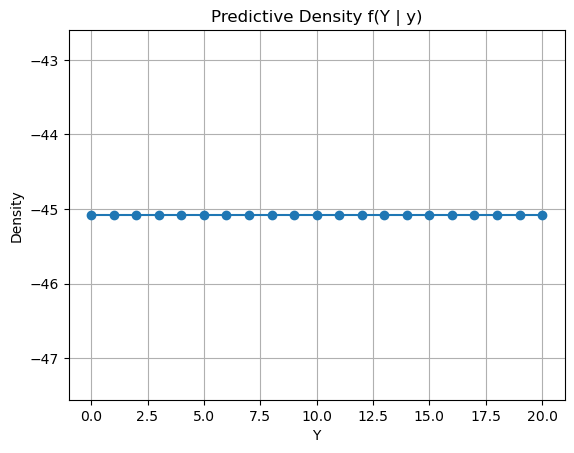

In [9]:
import math

def factorial(n):
    """Calculate factorial of a non-negative integer n."""
    if n == 0:
        return 1
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

def gamma_function(x):
    """Calculate the Gamma function for a non-negative integer x."""
    if x == int(x):
        return factorial(int(x) - 1)
    raise NotImplementedError("Gamma function approximation for non-integers is not implemented.")

def predictive_density(y, n, s):
    """Calculate predictive density f(Y | y)."""
    alpha = (n - 1) / 2
    beta = (n - 1) * s ** 2 / 2
    density = (gamma_function((n - 1) + 1) / (gamma_function((n - 1) / 2) * (n ** 0.5))) * \
               (2 - 2 * ((n - 1) + 1) / 2) * (1 + (s / n))
    return density

# Example parameters
n = 5       # Sample size
s = 2.0     # Sample standard deviation

# Generate values for Y
y_values = [i for i in range(0, 21)]  # Generate Y values from 0 to 20
densities = []

# Calculate predictive densities for each Y
for y in y_values:
    density_value = predictive_density(y, n, s)
    densities.append(density_value)

# Print results
for y, density in zip(y_values, densities):
    print(f"Y = {y}, Predictive Density f(Y | y) = {density:.4f}")

# Plotting (assuming you have matplotlib)
import matplotlib.pyplot as plt

plt.plot(y_values, densities, marker='o')
plt.title("Predictive Density f(Y | y)")
plt.xlabel("Y")
plt.ylabel("Density")
plt.grid(True)
plt.show()
